<a href="https://colab.research.google.com/github/jeraldflowers/Neurals-Network-Build/blob/main/Multiple_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters

## Data Downloads

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

## Word Dictionary

In [ ]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])
for _ in train_data[0]:
    print(word_index.get(_ -3))

In [ ]:
train_labels[0]

3

In [ ]:
train_data.shape

(8982,)

## Vectorizer Function

In [ ]:
def vectorizar(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        results[i, sequences]=1
    return results

## Transform Data

In [ ]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [ ]:
train_labels[1]

4

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Training

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/30
16/16 [==============================] - 1s 29ms/step - loss: 2.5904 - acc: 0.5178 - val_loss: 1.7224 - val_acc: 0.6340
Epoch 2/30
16/16 [==============================] - 0s 16ms/step - loss: 1.3845 - acc: 0.7097 - val_loss: 1.2878 - val_acc: 0.7170
Epoch 3/30
16/16 [==============================] - 0s 16ms/step - loss: 1.0204 - acc: 0.7849 - val_loss: 1.1181 - val_acc: 0.7760
Epoch 4/30
16/16 [==============================] - 0s 17ms/step - loss: 0.8008 - acc: 0.8311 - val_loss: 1.0297 - val_acc: 0.7930
Epoch 5/30
16/16 [==============================] - 0s 17ms/step - loss: 0.6382 - acc: 0.8668 - val_loss: 0.9734 - val_acc: 0.8150
Epoch 6/30
16/16 [==============================] - 0s 16ms/step - loss: 0.5107 - acc: 0.8970 - val_loss: 0.9062 - val_acc: 0.8160
Epoch 7/30
16/16 [==============================] - 0s 17ms/step - loss: 0.4088 - acc: 0.9181 - val_loss: 0.8829 - val_acc: 0.8220
Epoch 8/30
16/16 [==============================] - 0s 16ms/step - loss: 0.3318 - a

## Validate Results

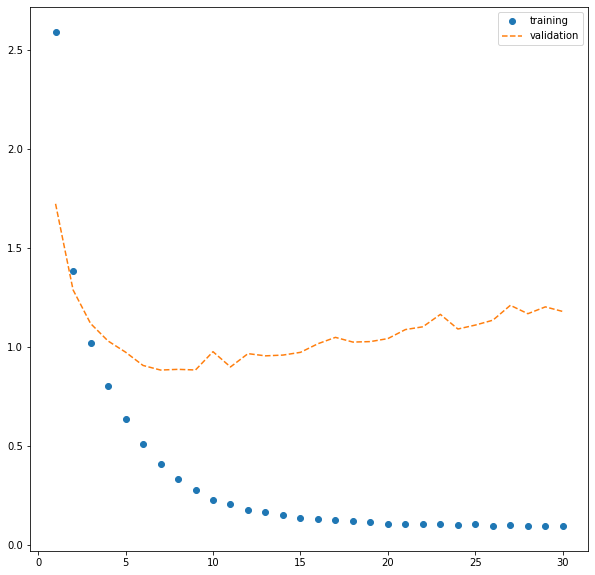

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values) +1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

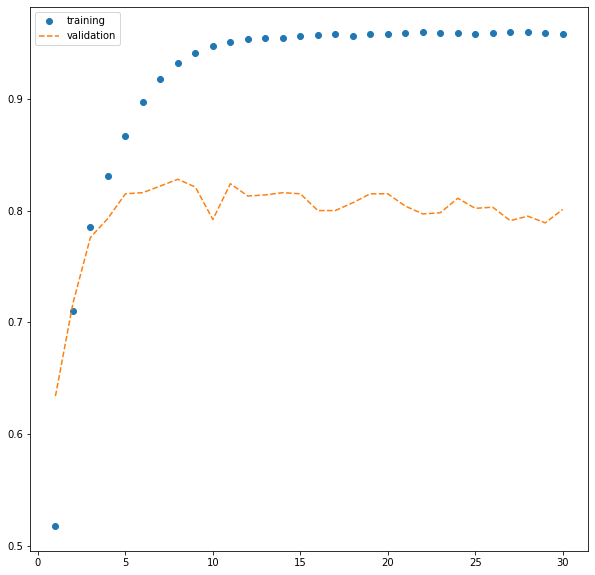

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values) +1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.3910 - acc: 0.7827


[1.390975832939148, 0.7827248573303223]

## Predictions

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [ ]:
predictions[0]

array([2.27886588e-07, 2.08539930e-07, 3.72498675e-07, 9.87140656e-01,
       1.17754266e-02, 5.77045398e-08, 7.24967308e-10, 1.73748148e-07,
       4.81352763e-05, 6.88558615e-08, 2.00546242e-06, 5.29501413e-04,
       6.11913777e-07, 5.57225849e-06, 2.11136836e-07, 1.07764159e-10,
       1.08920976e-04, 5.14479780e-07, 4.17439395e-07, 2.71953264e-04,
       8.48903073e-05, 4.98276540e-06, 6.54222347e-08, 4.91126730e-06,
       9.48357215e-09, 1.17424656e-06, 1.52832684e-12, 7.63494423e-09,
       2.29513510e-08, 1.32058346e-06, 2.57153403e-07, 2.19687560e-10,
       2.32994807e-07, 9.09519997e-08, 1.01525711e-06, 9.35289179e-08,
       1.55075159e-05, 2.57250775e-07, 3.29889218e-08, 9.24039778e-09,
       1.81505442e-08, 1.64178040e-08, 1.28552968e-09, 5.15301968e-10,
       1.18566537e-11, 6.16171647e-09], dtype=float32)

In [ ]:
np.sum(predictions[0])

0.99999994

In [ ]:
np.argmax(predictions[0])

3